In [6]:
import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras import layers

In [5]:
from tensorflow.keras import models

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

# splitting the dataset

training data set = 80%
testing dataset = 10%
validation dataset = 10%



seperating dataset manually

In [10]:
train_ds = dataset.take(54)

In [11]:
x_ = dataset.skip(54)

In [12]:
val_ds = x_.take(7)

In [13]:
test_ds = x_.skip(7)

In [14]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
7
7


In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255),
])

In [17]:
data_arg = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [18]:
no_of_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_arg,
    layers.Conv2D(32,(3,3),activation = "relu", input_shape = (32, 256, 256, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu", input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu", input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu", input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu", input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu", input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(no_of_classes,activation = 'softmax')
])
model.build(input_shape = (32, 256, 256, 3))

C:\Users\vinay kumar reddy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),optimizer = "adam",metrics = ['accuracy'])

In [21]:
history = model.fit(train_ds,epochs = 35, batch_size = 32,verbose = 1, validation_data = val_ds)

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4643 - loss: 0.9327 - val_accuracy: 0.5938 - val_loss: 0.7897
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7476 - loss: 0.6132 - val_accuracy: 0.8884 - val_loss: 0.3445
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8444 - loss: 0.3920 - val_accuracy: 0.9286 - val_loss: 0.2050
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9133 - loss: 0.2313 - val_accuracy: 0.8973 - val_loss: 0.2437
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9223 - loss: 0.1996 - val_accuracy: 0.8795 - val_loss: 0.4068
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9498 - loss: 0.1454 - val_accuracy: 0.9598 - val_loss: 0.1478
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9443 - loss: 0.1244 - val_accuracy: 0.9688 - val_loss: 0.1080
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9367 - loss: 0.1593 - val_accuracy: 0.9554 - val_loss:

In [22]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9894 - loss: 0.0524


In [23]:
scores

[0.06201168894767761, 0.9850000143051147]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

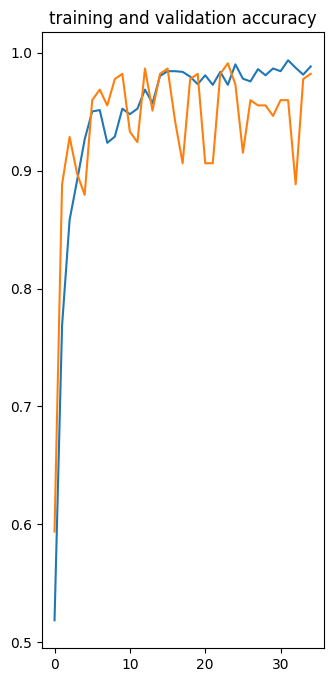

In [26]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(35), acc, label = 'training_accuracy')
plt.plot(range(35), val_acc, label = 'validation_accuracy')
plt.title('training and validation accuracy')
plt.show()

first image
actual label :  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Potato___Late_blight


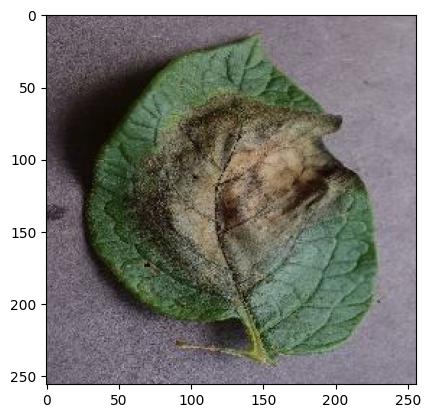

In [44]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image")
    plt.imshow(first_image)
    print('actual label : ', class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [48]:
model_version = 1
model.save(f"../models/{model_version}.keras")